# Домашнее задание к вебинару 6. Классификация текстов

In [1]:
# !wget "https://drive.google.com/uc?export=download&id=1vrQ5czMHoO3pEnmofFskymXMkq_u1dPc"
# !unzip imdb.zip
# !pip -q install eli5
# !pip -q install spacy
# !python -m spacy download en

--2022-06-14 12:25:29--  https://drive.google.com/uc?export=download&id=1vrQ5czMHoO3pEnmofFskymXMkq_u1dPc
Resolving drive.google.com (drive.google.com)... 142.251.12.113, 142.251.12.139, 142.251.12.101, ...
Connecting to drive.google.com (drive.google.com)|142.251.12.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/aodn5gkev7plj6crfllb0da4nph66edo/1655209500000/14571764687846983170/*/1vrQ5czMHoO3pEnmofFskymXMkq_u1dPc?e=download [following]
--2022-06-14 12:25:33--  https://doc-14-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/aodn5gkev7plj6crfllb0da4nph66edo/1655209500000/14571764687846983170/*/1vrQ5czMHoO3pEnmofFskymXMkq_u1dPc?e=download
Resolving doc-14-6k-docs.googleusercontent.com (doc-14-6k-docs.googleusercontent.com)... 74.125.24.132, 2404:6800:4003:c03::84
Connecting to doc-14-6k-docs.googleusercontent.com (doc-14-6k-docs.

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Классификация текстов

Начнём с самого простого - анализа тональности текста.

Будем классифицировать отзывы с IMDB на положительные/отрицательные.

Датасет взят с http://ai.stanford.edu/~amaas/data/sentiment/

In [5]:
import pandas as pd

train_df = pd.read_csv('/content/train.tsv', delimiter="\t")
test_df = pd.read_csv("/content/test.tsv", delimiter="\t")

print('Train size = {}'.format(len(train_df)))
print('Test size = {}'.format(len(test_df)))

Train size = 25000
Test size = 25000


Посмотрите глазами на тексты? Какие есть зацепки, как определить, что это за сентимент?

Самое простое, как всегда - найти ключевые слова.

In [6]:
train_df.head(3)

,is_positive,review
0,0,"Dreamgirls, despite its fistful of Tony wins i..."
1,0,This show comes up with interesting locations ...
2,1,I simply love this movie. I also love the Ramo...


In [7]:
#@title Начинаем классифицировать! { vertical-output: true, display-mode: "form" }
positive_words = 'love', 'great', 'best', 'wonderful' #@param {type:"raw"}
negative_words = 'worst', 'awful', '1/10', 'crap' #@param {type:"raw"}

# Считаем количество встречающихся положительных и отрицательных слов в предложении
positives_count = test_df.review.apply(lambda text: sum(word in text for word in positive_words))
negatives_count = test_df.review.apply(lambda text: sum(word in text for word in negative_words))

# Позитивным будет считаться тот отзыв, где позитивных слов больше, чем негативных
is_positive = positives_count > negatives_count

# Считаем сколько корректных совпадений
correct_count = (is_positive == test_df.is_positive).values.sum()

# Считаем и выводим  accuracy
accuracy = correct_count / len(test_df)

print('Test accuracy = {:.2%}'.format(accuracy))
if accuracy > 0.71:
    from IPython.display import Image, display
    display(Image('https://s3.amazonaws.com/achgen360/t/rmmoZsub.png', width=500))

Test accuracy = 66.73%


**Задание** Придумайте хорошие ключевые слова или фразы и наберите хотя бы 71% точности на тесте (и не забудьте посмотреть на код классификации!)

In [8]:
# Сформируем списки позитивных и негативных слов
positive_words =  ['great','best', 'wonderful', 'breathtaking', 'first-rate', 'brilliant', 
                   'magnetic', 'insightful', 'well-paced', 'must-see', 'charismatic', 'fabulous',
                   'enjoyable', 'hilarious', 'absorbing', 'riveting', 'intriguing', 
                   'powerful', 'fascinating', 'excellent',  'perfect', 'surprised',
                   'delightful', 'incredible', 'fantastic', 'ideal', 'amazing', 'liked',
                   'refreshing', 'wonderfully', 'funniest', 'surprisingly','intriguing', 'absorbing',
                   'rare', 'superb']
negative_words =  ['worst', 'awful', '1/10', 'crap', 'second-rate', 'stupid', '3', 'frustrating', 
                    'moronic', 'third-rate',  'juvenile','boring', 'horrid', 'nonsense',
                  'worse', 'dull', 'mildly', 'redeeming', 'baldwin', 'weak', 'wooden']

positives_count = test_df.review.apply(lambda text: sum(word in text for word in positive_words))
negatives_count = test_df.review.apply(lambda text: sum(word in text for word in negative_words))
is_positive = positives_count > negatives_count
correct_count = (is_positive == test_df.is_positive).values.sum()

# Подсчитаем и выведем accuracy, в идеале чтобы он был выше требуемого порога в 71%
accuracy = correct_count / len(test_df)

print('Test accuracy = {:.2%}'.format(accuracy))

Test accuracy = 73.36%


**Задание** Кому-нибудь нравятся эти `<br /><br />`? Лично мне - нет. Напишите регулярку, которая будет их удалять

In [9]:
import re

pattern = re.compile('<br />')

print(train_df['review'].iloc[3])
print(pattern.subn(' ', train_df['review'].iloc[3])[0])

Spoilers ahead if you want to call them that...<br /><br />I would almost recommend this film just so people can truly see a 1/10. Where to begin, we'll start from the top...<br /><br />THE STORY: Don't believe the premise - the movie has nothing to do with abandoned cars, and people finially understanding what the mysterious happenings are. It's a draub, basic, go to cabin movie with no intensity or "effort".<br /><br />THE SCREENPLAY: I usually give credit to indie screenwriters, it's hard work when you are starting out...but this is crap. The story is flat - it leaves you emotionless the entire movie. The dialogue is extremely weak and predictable boasting lines of "Woah, you totally freaked me out" and "I was wondering if you'd uh...if you'd like to..uh, would you come to the cabin with me?". It makes me want to rip out all my hair, one strand at a time and feed it to myself.<br /><br />THE CHARACTERS: HOLY CRAP!!!! Some have described the characters as flat, I want to take it one 

Применим ее:

In [10]:
train_df['review'] = train_df['review'].apply(lambda text: pattern.subn(' ', text)[0])
test_df['review'] = test_df['review'].apply(lambda text: pattern.subn(' ', text)[0])

Пора переходить к машинке!

Как будем представлять текст? Проще всего - мешком слов.

Заведём большой-большой словарь - список всех слов в обучающей выборке. Тогда каждое предложение можно представить в виде вектора, в котором будет записано, сколько раз встретилось каждое из возможных слов:

![bow](https://raw.githubusercontent.com/DanAnastasyev/DeepNLP-Course/master/Week%2001/Images/BOW.png)

Простой и приятный способ сделать это - запихнуть тексты в `CountVectorizer`.

Он имеет такую сигнатуру:

```python
CountVectorizer(input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern=r'(?u)\b\w\w+\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class ‘numpy.int64'>)
```

Для начала обратим внимание на параметры `lowercase=True` и `max_df=1.0, min_df=1, max_features=None` - они про то, что по умолчанию все слова будут приводиться к нижнему регистру и в словарь попадут все слова, встречавшиеся в текстах.

При желании можно было бы убрать слишком редкие или слишком частотные слова - пока не будем этого делать.

Посмотрим на простом примере, как он будет работать:

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

dummy_data = ['The movie was excellent',
              'the movie was awful']

dummy_matrix = vectorizer.fit_transform(dummy_data)

print(dummy_matrix.toarray())
print(vectorizer.get_feature_names())

[[0 1 1 1 1]
 [1 0 1 1 1]]
['awful', 'excellent', 'movie', 'the', 'was']


In [12]:
vectorizer.get_feature_names()

['awful', 'excellent', 'movie', 'the', 'was']

*Как именно vectorizer определяет границы слов? Обратите внимание на параметр `token_pattern=r'(?u)\b\w\w+\b'` - как он будет работать?*

Запустим его на реальных данных:

In [13]:
vectorizer = CountVectorizer()
vectorizer.fit(train_df['review'].values)

CountVectorizer()

Посмотрим на слова, попавшие в словарь:

In [14]:
vectorizer.get_feature_names()

['00',
 '000',
 '0000000000001',
 '00001',
 '00015',
 '000s',
 '001',
 '003830',
 '006',
 '007',
 '0079',
 '0080',
 '0083',
 '0093638',
 '00am',
 '00pm',
 '00s',
 '01',
 '01pm',
 '02',
 '020410',
 '029',
 '03',
 '04',
 '041',
 '05',
 '050',
 '06',
 '06th',
 '07',
 '08',
 '087',
 '089',
 '08th',
 '09',
 '0f',
 '0ne',
 '0r',
 '0s',
 '10',
 '100',
 '1000',
 '1000000',
 '10000000000000',
 '1000lb',
 '1000s',
 '1001',
 '100b',
 '100k',
 '100m',
 '100min',
 '100mph',
 '100s',
 '100th',
 '100x',
 '100yards',
 '101',
 '101st',
 '102',
 '102nd',
 '103',
 '104',
 '1040',
 '1040a',
 '1040s',
 '105',
 '1050',
 '105lbs',
 '106',
 '106min',
 '107',
 '108',
 '109',
 '10am',
 '10lines',
 '10mil',
 '10min',
 '10minutes',
 '10p',
 '10pm',
 '10s',
 '10star',
 '10th',
 '10x',
 '10yr',
 '11',
 '110',
 '1100',
 '11001001',
 '1100ad',
 '111',
 '112',
 '1138',
 '114',
 '1146',
 '115',
 '116',
 '117',
 '11f',
 '11m',
 '11th',
 '12',
 '120',
 '1200',
 '1200f',
 '1201',
 '1202',
 '123',
 '12383499143743701',
 '1

Попробуем кого-нибудь таки сконвертировать

In [15]:
vectorizer.transform([train_df['review'].iloc[3]])

<1x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 206 stored elements in Compressed Sparse Row format>

То, что и хотели - вектор с bow (т.е. bag-of-words) представлением исходного текста.

И чем эта информация может помочь? Ну, всё тем же - какие-то слова носят положительный окрас, какие-то - отрицательный. Большинство вообще нейтральный, да.

![bow with weights](https://github.com/DanAnastasyev/DeepNLP-Course/raw/master/Week%2001/Images/BOW_weights.png)

Хочется, наверное, подобрать коэффициенты, которые будут определять уровень окраса, да? Подбирать нужно по обучающей выборке, а не как мы перед этим делали.

Например, для выборки
```
1   The movie was excellent
0   the movie was awful
```
легко подобрать коэффициенты на глазок: что-нибудь вроде `+1` для `excellent`,  `-1` для `awful` и по нулям всем остальным.

Построим линейную модель, которая станет этим заниматься. **Она будет учиться строить разделяющую гиперплоскость в пространстве bow-векторов.**

Проверим, как справится логистическая регрессия с нашей супер-выборкой из пары предложений

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

dummy_data = ['The movie was excellent',
              'the movie was awful']
dummy_labels = [1, 0]

vectorizer = CountVectorizer()
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(dummy_data, dummy_labels)

print(vectorizer.get_feature_names())
print(classifier.coef_)

['awful', 'excellent', 'movie', 'the', 'was']
[[-0.40104279  0.40104279  0.          0.          0.        ]]


Получилось что надо.

Запустим теперь её на реальных данных.

In [17]:
model.fit(train_df['review'], train_df['is_positive'])

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', LogisticRegression())])

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def eval_model(model, x_test, y_test):
    preds = model.predict(x_test)
    print('Test precision = {:.2%}'.format(precision_score(y_test, preds)))
    print('Test recall = {:.2%}'.format(recall_score(y_test, preds)))
    print('Test f1 = {:.2%}'.format(f1_score(y_test, preds)))
    print('Test accuracy = {:.2%}'.format(accuracy_score(y_test, preds)))
    
eval_model(model, test_df['review'], test_df['is_positive'])

Test precision = 87.04%
Test recall = 85.77%
Test f1 = 86.40%
Test accuracy = 86.50%


Прогресс!

Хочется как-то посмотреть, что заинтересовало классификатор. К счастью, сделать это совсем просто:

In [20]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 8.8 MB/s 
     |████████████████████████████████| 133 kB 61.8 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=5dbff3d32fddb8bf841aa59653de9843f743d308443533f63e847e5288908475
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is inco

In [21]:
import eli5
eli5.show_weights(classifier, vec=vectorizer, top=40)

Weight?,Feature
+1.855,refreshing
+1.760,wonderfully
+1.689,funniest
+1.647,surprisingly
+1.626,rare
+1.432,superb
+1.401,excellent
+1.365,incredible
+1.351,perfect
+1.302,delightful


Посмотрим на конкретные примеры его работы:

In [22]:
print('Positive' if test_df['is_positive'].iloc[1] else 'Negative')
eli5.show_prediction(classifier, test_df['review'].iloc[1], vec=vectorizer, 
                     targets=['positive'], target_names=['negative', 'positive'])

Positive


In [23]:
print('Positive' if test_df['is_positive'].iloc[6] else 'Negative')
eli5.show_prediction(classifier, test_df['review'].iloc[6], vec=vectorizer, 
                     targets=['positive'], target_names=['negative', 'positive'])

Negative


Посмотрим на примеры неправильной классификации, наконец:

In [24]:
import numpy as np

preds = model.predict(test_df['review'])
incorrect_pred_index = np.random.choice(np.where(preds != test_df['is_positive'])[0])

eli5.show_prediction(classifier, test_df['review'].iloc[incorrect_pred_index],
                     vec=vectorizer, targets=['positive'], target_names=['negative', 'positive'])

## Придумываем новые признаки

### Tf-idf

Сейчас мы на все слова смотрим с одинаковым весом - хотя какие-то из них более редкие, какие-то более частые, и эта частотность - полезная, вообще говоря, информация.

Самый простой способ добавить статистическую информацию о частотностях - сделать *tf-idf* взвешивание:

$$\text{tf-idf}(t, d) = \text{tf}(t, d) \times \text{idf}(t)$$

*tf* - term-frequency - частотность слова `t` в конкретном документе `d` (рецензии в нашем случае). Это ровно то, что мы уже считали.

*idf* - inverse document-frequency - коэффициент, который тем больше, чем в меньшем числе документов встречалось данное слово. Считается как-нибудь так:
$$\text{idf}(t) = \text{log}\frac{1 + n_d}{1 + n_{d(t)}} + 1$$
где $n_d$ - число всех документов, а $n_{d(t)}$ - число документов со словом `t`.

Использовать его просто - нужно заменить `CountVectorizer` на `TfidfVectorizer`.

**Задание** Попробуйте запустить `TfidfVectorizer`. Посмотрите на ошибки, которые он научился исправлять, и на ошибки, которые он начал делать - по сравнению с `CountVectorizer`.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['review'], train_df['is_positive'])

eval_model(model, test_df['review'], test_df['is_positive'])

Test precision = 88.37%
Test recall = 88.17%
Test f1 = 88.27%
Test accuracy = 88.28%


После применения TFIDF Vectorizer, метрики заметно подросли, особенно recall

### N-граммы слов

До сих пор мы смотрели на тексты как на мешок слов - но очевидно, что есть разница между `good movie` и `not good movie`.

Добавим информацию (хоть какую-то) о последовательностях слов - будем извлекать еще и биграммы слов.

В Vectorizer'ах для этого есть параметр `ngram_range=(n_1, n_2)` - он говорит, что нужны n_1-...n_2-граммы.

**Задание** Попробуйте увеличенный range и поинтерпретируйте полученный результат.

In [26]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['review'], train_df['is_positive'])

eval_model(model, test_df['review'], test_df['is_positive'])

Test precision = 88.01%
Test recall = 89.47%
Test f1 = 88.74%
Test accuracy = 88.64%


Попробуем расширить количество ngamm до триграм

In [27]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3))
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['review'], train_df['is_positive'])

eval_model(model, test_df['review'], test_df['is_positive'])

Test precision = 87.01%
Test recall = 88.76%
Test f1 = 87.88%
Test accuracy = 87.76%


Наблююдаем варьирование метрики. Расширяя набор ngram до unigrams+bigrams+trigrams - метрики немного снижаются. Используя unigrams+bigrams метрики в целом незначительно отличаются от результатов модели, в предобработке которой использовались только unigrams (увеличился только recall)  

Сделаем дополнительный эксперимент: bigrams + trigrams

In [28]:
vectorizer = TfidfVectorizer(ngram_range=(2, 3))
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['review'], train_df['is_positive'])

eval_model(model, test_df['review'], test_df['is_positive'])

Test precision = 85.62%
Test recall = 87.50%
Test f1 = 86.55%
Test accuracy = 86.40%


In [29]:
vectorizer = TfidfVectorizer(ngram_range=(2, 6))
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['review'], train_df['is_positive'])

eval_model(model, test_df['review'], test_df['is_positive'])

Test precision = 85.39%
Test recall = 84.45%
Test f1 = 84.92%
Test accuracy = 85.00%


При подходе bigrams + trigrams результат еще понизился

### N-граммы символов

Символьные n-граммы дают простой способ выучить полезные корни и суффиксы, не связываясь с этой вашей лингвистикой - только статистика, только хардкор.

Например, слово `badass` мы можем представить в виде такой последовательности триграмм:

`##b #ba bad ada das ass ss# s##`

So interpretable, неправда ли?

Реализовать это дело всё так же просто - нужно поставить `analyzer='char'` в вашем любимом Vectorizer'е и выбрать размер `ngram_range`.

**Задание** Запилите классификатор на n-граммах символов и визуализируйте его.

In [30]:
vectorizer = TfidfVectorizer(ngram_range=(2, 6), max_features=20000, analyzer='char')
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['review'], train_df['is_positive'])

eval_model(model, test_df['review'], test_df['is_positive'])

Test precision = 87.48%
Test recall = 88.35%
Test f1 = 87.92%
Test accuracy = 87.86%


In [31]:
print('Positive' if test_df['is_positive'].iloc[1] else 'Negative')
eli5.show_prediction(classifier, test_df['review'].iloc[1], vec=vectorizer, 
                     targets=['positive'], target_names=['negative', 'positive'])

Positive


## Подключаем лингвистику

### Лемматизация и стемминг

Если присмотреться, можно найти формы одного слова с разной семантической окраской по мнению классификатора. Или нет?

**Задание** Найти формы слова с разной семантической окраской.

Поверя, что они есть, попробуем что-нибудь с этим сделать.

Например, лемматизируем - сведем к начальной форме все слова. Поможет в этом библиотека spacy.

In [32]:
import spacy
from spacy import displacy

nlp = spacy.load('en', disable=['parser'])

docs = [doc for doc in nlp.pipe(train_df.review.values[:50])]

In [37]:
for token in docs[0][:20]:
    print(token.text, token.lemma_, token.ent_iob_, token.ent_type_)

Dreamgirls Dreamgirls B ORG
, , O 
despite despite O 
its -PRON- O 
fistful fistful O 
of of O 
Tony Tony B PERSON
wins win O 
in in O 
an an B DATE
incredibly incredibly I DATE
weak weak I DATE
year year I DATE
on on O 
Broadway Broadway B FAC
, , O 
has have O 
never never O 
been be O 
what what O 


**Задание** Сделайте классификатор на лемматизированных текстах.

In [34]:
train_df.head(5)

,is_positive,review
0,0,"Dreamgirls, despite its fistful of Tony wins i..."
1,0,This show comes up with interesting locations ...
2,1,I simply love this movie. I also love the Ramo...
3,0,Spoilers ahead if you want to call them that.....
4,1,My all-time favorite movie! I have seen many m...


In [38]:
# Создадим функцию для лемматизации
def lemmatize_text(text):
    doc = nlp(text)
    tokens_lemm_list = [token.lemma_ for token in doc]
    lemmatize_text = ' '.join(tokens_lemm_list)
    return lemmatize_text

In [40]:
#применим преобразования 
train_df['review_lemmatized'] = train_df['review'].apply(lemmatize_text)
train_df.head()

,is_positive,review,review_lemmatized
0,0,"Dreamgirls, despite its fistful of Tony wins i...","Dreamgirls , despite -PRON- fistful of Tony wi..."
1,0,This show comes up with interesting locations ...,this show come up with interesting location as...
2,1,I simply love this movie. I also love the Ramo...,-PRON- simply love this movie . -PRON- also lo...
3,0,Spoilers ahead if you want to call them that.....,spoiler ahead if -PRON- want to call -PRON- th...
4,1,My all-time favorite movie! I have seen many m...,-PRON- all - time favorite movie ! -PRON- have...


In [41]:
#аналогично к тестовому датасету
test_df['review_lemmatized'] = test_df['review'].apply(lemmatize_text)
test_df.head()

,is_positive,review,review_lemmatized
0,0,A formulaic story with all the tired cliches. ...,a formulaic story with all the tired cliche . ...
1,1,This is both an entertaining and a touching ve...,this be both an entertaining and a touching ve...
2,0,Corey Haim is never going to be known as one o...,Corey Haim be never go to be know as one of th...
3,1,If you believe that any given war movie can ma...,if -PRON- believe that any give war movie can ...
4,1,Carla Gugino literally melts the screen in thi...,Carla Gugino literally melt the screen in this...


In [42]:
# обучим классификатор на лемматизированных текстах , используя униграммы и биграммы. 
# Эмпирически удалось определить, что униграммы и униграммы совместно с биграммами в векторайзере дают наилучший результат

vectorizer = TfidfVectorizer(ngram_range=(1, 2))
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['review_lemmatized'], train_df['is_positive'])

eval_model(model, test_df['review_lemmatized'], test_df['is_positive'])

Test precision = 88.00%
Test recall = 89.38%
Test f1 = 88.69%
Test accuracy = 88.60%


С лемматизацией метрики стали лучше, чем без нее.

Теперь уберем еще пунктацию и стоп-слова и обучим заново

In [43]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [44]:
from string import punctuation
#знаки пунктуации
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
noise = stopwords.words("english") + list(punctuation)

In [46]:
#каждый review разбиваем на лемматизированные токены и убираем мусор
def lemmatize_clear_text(text):
    doc = nlp(text)
    tokens_lemm_list = [token.lemma_ for token in doc]
    tokens_lemm_list_clear = [token for token in tokens_lemm_list if not token in noise]
    lemmatize_clear_text = ' '.join(tokens_lemm_list_clear)
    return lemmatize_clear_text

In [47]:
#применим преобразования
train_df['review_lemmatized_clear'] = train_df['review'].apply(lemmatize_clear_text)
train_df.head()

,is_positive,review,review_lemmatized,review_lemmatized_clear
0,0,"Dreamgirls, despite its fistful of Tony wins i...","Dreamgirls , despite -PRON- fistful of Tony wi...",Dreamgirls despite -PRON- fistful Tony win inc...
1,0,This show comes up with interesting locations ...,this show come up with interesting location as...,show come interesting location fast travel cha...
2,1,I simply love this movie. I also love the Ramo...,-PRON- simply love this movie . -PRON- also lo...,-PRON- simply love movie -PRON- also love Ramo...
3,0,Spoilers ahead if you want to call them that.....,spoiler ahead if -PRON- want to call -PRON- th...,spoiler ahead -PRON- want call -PRON- ... -P...
4,1,My all-time favorite movie! I have seen many m...,-PRON- all - time favorite movie ! -PRON- have...,-PRON- time favorite movie -PRON- see many mov...


In [49]:
#аналогично к тестовому датасету
test_df['review_lemmatized_clear'] = test_df['review'].apply(lemmatize_clear_text)
test_df.head()

,is_positive,review,review_lemmatized,review_lemmatized_clear
0,0,A formulaic story with all the tired cliches. ...,a formulaic story with all the tired cliche . ...,formulaic story tired cliche -PRON- shocked ho...
1,1,This is both an entertaining and a touching ve...,this be both an entertaining and a touching ve...,entertaining touching version classic tale als...
2,0,Corey Haim is never going to be known as one o...,Corey Haim be never go to be know as one of th...,Corey Haim never go know one great actor -PRON...
3,1,If you believe that any given war movie can ma...,if -PRON- believe that any give war movie can ...,-PRON- believe give war movie make -PRON- real...
4,1,Carla Gugino literally melts the screen in thi...,Carla Gugino literally melt the screen in this...,Carla Gugino literally melt screen crime caper...


In [50]:
#обучим классификатор на лемматизированных и вычищенных текстах
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['review_lemmatized_clear'], train_df['is_positive'])

eval_model(model, test_df['review_lemmatized_clear'], test_df['is_positive'])

Test precision = 86.87%
Test recall = 88.69%
Test f1 = 87.77%
Test accuracy = 87.64%


Метрика f1 понизилась, получается лучше делать лемматизацию, а стоп-слова и пунктуацию не удалять

Попробуем вместо лемм обучить тэги

In [51]:
# делаем лемматизацию
# При этом токены, у которых есть тег, заменяем тегом!
def lemmatize_entity_text(text):
    doc = nlp(text)
    tokens_lemm_list = [token.lemma_ if not token.ent_type_  else token.ent_type_ for token in doc]
    lemmatize_entity_text = ' '.join(tokens_lemm_list)
    return lemmatize_entity_text

In [52]:
train_df['review_lemmatized_entity'] = train_df['review'].apply(lemmatize_entity_text)
train_df.head()

,is_positive,review,review_lemmatized,review_lemmatized_clear,review_lemmatized_entity
0,0,"Dreamgirls, despite its fistful of Tony wins i...","Dreamgirls , despite -PRON- fistful of Tony wi...",Dreamgirls despite -PRON- fistful Tony win inc...,"ORG , despite -PRON- fistful of PERSON win in ..."
1,0,This show comes up with interesting locations ...,this show come up with interesting location as...,show come interesting location fast travel cha...,this show come up with interesting location as...
2,1,I simply love this movie. I also love the Ramo...,-PRON- simply love this movie . -PRON- also lo...,-PRON- simply love movie -PRON- also love Ramo...,-PRON- simply love this movie . -PRON- also lo...
3,0,Spoilers ahead if you want to call them that.....,spoiler ahead if -PRON- want to call -PRON- th...,spoiler ahead -PRON- want call -PRON- ... -P...,spoiler ahead if -PRON- want to call -PRON- th...
4,1,My all-time favorite movie! I have seen many m...,-PRON- all - time favorite movie ! -PRON- have...,-PRON- time favorite movie -PRON- see many mov...,-PRON- all - time favorite movie ! -PRON- have...


In [57]:
test_df['review_lemmatized_enity'] = test_df['review'].apply(lemmatize_entity_text)
test_df.head()

,is_positive,review,review_lemmatized,review_lemmatized_clear,review_lemmatized_entity,review_lemmatized_enity
0,0,A formulaic story with all the tired cliches. ...,a formulaic story with all the tired cliche . ...,formulaic story tired cliche -PRON- shocked ho...,a formulaic story with all the tired cliche . ...,a formulaic story with all the tired cliche . ...
1,1,This is both an entertaining and a touching ve...,this be both an entertaining and a touching ve...,entertaining touching version classic tale als...,this be both an entertaining and a touching ve...,this be both an entertaining and a touching ve...
2,0,Corey Haim is never going to be known as one o...,Corey Haim be never go to be know as one of th...,Corey Haim never go know one great actor -PRON...,PERSON PERSON be never go to be know as CARDIN...,PERSON PERSON be never go to be know as CARDIN...
3,1,If you believe that any given war movie can ma...,if -PRON- believe that any give war movie can ...,-PRON- believe give war movie make -PRON- real...,if -PRON- believe that any give war movie can ...,if -PRON- believe that any give war movie can ...
4,1,Carla Gugino literally melts the screen in thi...,Carla Gugino literally melt the screen in this...,Carla Gugino literally melt screen crime caper...,PERSON PERSON literally melt the screen in thi...,PERSON PERSON literally melt the screen in thi...


In [58]:
#обучим классификатор на лемматизированных текстах, в которых токены заменены тегами
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['review_lemmatized_entity'], train_df['is_positive'])

eval_model(model, test_df['review_lemmatized_enity'], test_df['is_positive'])

Test precision = 87.55%
Test recall = 89.53%
Test f1 = 88.53%
Test accuracy = 88.40%


Величина f1 все равно немного ниже, чем если обучать на лемматизированных токенах (там f1 = 88.69%). Precision и recall также ниже

**Задание** Попробуйте вместо лемм классифицировать основы. Применим стэмминг

In [59]:
from nltk import PorterStemmer

stemmer = PorterStemmer()

print(stemmer.stem('become'))
print(stemmer.stem('becomes'))
print(stemmer.stem('became'))

becom
becom
becam


In [61]:
def stem_text(text):
    list_word = text.split()
    list_stem = [stemmer.stem(word) for word in list_word]
    stem_text = ' '.join(list_stem)
    return stem_text

In [62]:
#применим преобразования к тренировочному датасету
train_df['stem_review'] = train_df['review'].apply(stem_text)
train_df.head(3)

,is_positive,review,review_lemmatized,review_lemmatized_clear,review_lemmatized_entity,stem_review
0,0,"Dreamgirls, despite its fistful of Tony wins i...","Dreamgirls , despite -PRON- fistful of Tony wi...",Dreamgirls despite -PRON- fistful Tony win inc...,"ORG , despite -PRON- fistful of PERSON win in ...","dreamgirls, despit it fist of toni win in an i..."
1,0,This show comes up with interesting locations ...,this show come up with interesting location as...,show come interesting location fast travel cha...,this show come up with interesting location as...,thi show come up with interest locat as fast a...
2,1,I simply love this movie. I also love the Ramo...,-PRON- simply love this movie . -PRON- also lo...,-PRON- simply love movie -PRON- also love Ramo...,-PRON- simply love this movie . -PRON- also lo...,i simpli love thi movie. i also love the ramon...


In [63]:
test_df['stem_review'] = test_df['review'].apply(stem_text)
test_df.head(3)

,is_positive,review,review_lemmatized,review_lemmatized_clear,review_lemmatized_entity,review_lemmatized_enity,stem_review
0,0,A formulaic story with all the tired cliches. ...,a formulaic story with all the tired cliche . ...,formulaic story tired cliche -PRON- shocked ho...,a formulaic story with all the tired cliche . ...,a formulaic story with all the tired cliche . ...,a formula stori with all the tire cliches. i w...
1,1,This is both an entertaining and a touching ve...,this be both an entertaining and a touching ve...,entertaining touching version classic tale als...,this be both an entertaining and a touching ve...,this be both an entertaining and a touching ve...,thi is both an entertain and a touch version o...
2,0,Corey Haim is never going to be known as one o...,Corey Haim be never go to be know as one of th...,Corey Haim never go know one great actor -PRON...,PERSON PERSON be never go to be know as CARDIN...,PERSON PERSON be never go to be know as CARDIN...,corey haim is never go to be known as one of t...


In [64]:
#обучим классификатор на основах
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['stem_review'], train_df['is_positive'])

eval_model(model, test_df['stem_review'], test_df['is_positive'])

Test precision = 87.70%
Test recall = 89.06%
Test f1 = 88.37%
Test accuracy = 88.28%


Ожидаемо результат после применения стемминга уступает результату после применения лемматизации.

### NER

В текстах рецензий очень много именованных сущностей. Вот, например:

In [65]:
displacy.render(docs[0], style='ent', jupyter=True)

Вообще говоря, почему вдруг какой-нибудь Депп должен нести семантическую окраску? Однако оказывается, что классификатор выучивает, что какие-то имена чаще в положительных рецензиях - или наоборот. Это похоже на переобучение - почему бы не попробовать вырезать сущности?

**Задание** Удалите из текстов какие-то из сущностей, пользуясь координатами из запикленных файлов. Описание сущностей можно посмотреть [здесь](https://spacy.io/api/annotation#named-entities). Запустите классификатор.

In [66]:
# Удалим тэг PERSON

def del_entity_PERSON(text):
    doc = nlp(text)
    tokens_lemm_list = [token.lemma_ for token in doc if token.ent_type_ !='PERSON']
    del_entity_PERSON  = ' '.join(tokens_lemm_list)
    return del_entity_PERSON

In [68]:
#применим преобразования к тренировочному датасету
train_df['lemm_del_entity_PERSON'] = train_df['review'].apply(del_entity_PERSON)
train_df.head(2)

,is_positive,review,review_lemmatized,review_lemmatized_clear,review_lemmatized_entity,stem_review,lemm_del_entity_PERSON
0,0,"Dreamgirls, despite its fistful of Tony wins i...","Dreamgirls , despite -PRON- fistful of Tony wi...",Dreamgirls despite -PRON- fistful Tony win inc...,"ORG , despite -PRON- fistful of PERSON win in ...","dreamgirls, despit it fist of toni win in an i...","Dreamgirls , despite -PRON- fistful of win in ..."
1,0,This show comes up with interesting locations ...,this show come up with interesting location as...,show come interesting location fast travel cha...,this show come up with interesting location as...,thi show come up with interest locat as fast a...,this show come up with interesting location as...


In [67]:
test_df['lemm_del_entity_PERSON'] = test_df['review'].apply(del_entity_PERSON)
test_df.head()

,is_positive,review,review_lemmatized,review_lemmatized_clear,review_lemmatized_entity,review_lemmatized_enity,stem_review,lemm_del_entity_PERSON
0,0,A formulaic story with all the tired cliches. ...,a formulaic story with all the tired cliche . ...,formulaic story tired cliche -PRON- shocked ho...,a formulaic story with all the tired cliche . ...,a formulaic story with all the tired cliche . ...,a formula stori with all the tire cliches. i w...,a formulaic story with all the tired cliche . ...
1,1,This is both an entertaining and a touching ve...,this be both an entertaining and a touching ve...,entertaining touching version classic tale als...,this be both an entertaining and a touching ve...,this be both an entertaining and a touching ve...,thi is both an entertain and a touch version o...,this be both an entertaining and a touching ve...
2,0,Corey Haim is never going to be known as one o...,Corey Haim be never go to be know as one of th...,Corey Haim never go know one great actor -PRON...,PERSON PERSON be never go to be know as CARDIN...,PERSON PERSON be never go to be know as CARDIN...,corey haim is never go to be known as one of t...,be never go to be know as one of the great act...
3,1,If you believe that any given war movie can ma...,if -PRON- believe that any give war movie can ...,-PRON- believe give war movie make -PRON- real...,if -PRON- believe that any give war movie can ...,if -PRON- believe that any give war movie can ...,if you believ that ani given war movi can make...,if -PRON- believe that any give war movie can ...
4,1,Carla Gugino literally melts the screen in thi...,Carla Gugino literally melt the screen in this...,Carla Gugino literally melt screen crime caper...,PERSON PERSON literally melt the screen in thi...,PERSON PERSON literally melt the screen in thi...,carla gugino liter melt the screen in thi crim...,literally melt the screen in this crime caper ...


In [70]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['lemm_del_entity_PERSON'], train_df['is_positive'])

eval_model(model, test_df['lemm_del_entity_PERSON'], test_df['is_positive'])

Test precision = 88.05%
Test recall = 89.69%
Test f1 = 88.86%
Test accuracy = 88.76%


На данный момент, это самые высокие результаты классификатора. Лемматизация и удаление одной из сущностей оказалось полезным.

## Включаем deep learning

Мы тут пришли deep learning'ом заниматься, а делаем почему-то модель на логистической регрессии. Как так?

Попробуем запустить относительно стандартную модель для классификации текстов - сверточная сеть поверх словных эмбеддингов.

Разбираться, что это за зверь, будем на следующих занятиях, а пока будем просто им пользоваться :)

Каждое предложение нужно представлять набором слов - и сразу же начинаются проблемы. Во-первых, как ограничить длину предложения?

Прикинем по гистограмме, какая длина нам подходит:

In [71]:
train_df['review']

0        Dreamgirls, despite its fistful of Tony wins i...
1        This show comes up with interesting locations ...
2        I simply love this movie. I also love the Ramo...
3        Spoilers ahead if you want to call them that.....
4        My all-time favorite movie! I have seen many m...
                               ...                        
24995    I am a big fan of the movie, but not for the u...
24996    I'm not going to bother with a plot synopsis s...
24997    This movie . . . I don't know. Why they would ...
24998    Saw this film on DVD yesterday and was gob-sma...
24999    This was a disappointment - none of the nuance...
Name: review, Length: 25000, dtype: object

<a list of 231 Patch objects>

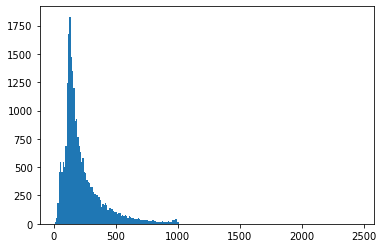

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt

_, _, hist = plt.hist(train_df.review.apply(lambda text: len(text.split())), bins='auto')
hist

Кроме этого, нужно перенумеровать как-то слова.

In [79]:
from collections import Counter

words_counter = Counter((word for text in train_df.review for word in text.lower().split()))
words_counter

Counter({'dreamgirls,': 1,
         'despite': 1308,
         'its': 8037,
         'fistful': 5,
         'of': 144660,
         'tony': 405,
         'wins': 125,
         'in': 91507,
         'an': 21338,
         'incredibly': 606,
         'weak': 565,
         'year': 1406,
         'on': 31814,
         'broadway,': 20,
         'has': 16581,
         'never': 6341,
         'been': 9077,
         'what': 14545,
         'one': 22876,
         'would': 12042,
         'call': 845,
         'a': 160693,
         'jewel': 39,
         'the': 329632,
         'crown': 44,
         'stage': 516,
         'musicals.': 29,
         'however,': 2541,
         'that': 66478,
         'is': 104251,
         'not': 28803,
         'to': 134235,
         'say': 4395,
         'right': 2380,
         'cinematic': 401,
         'hands': 458,
         'it': 66485,
         'could': 7600,
         'be': 25708,
         'fleshed': 46,
         'out': 14519,
         'and': 159316,
         'po

In [81]:
# words_counter.most_common()  - выводит слова и их количество в тексте в порядке убывания

In [83]:
word2idx = {
    '': 0,
    '<unk>': 1
}
for word, count in words_counter.most_common():
    if count < 10: # не берем те, которые встречаются менее 10 раз
        break
        
    word2idx[word] = len(word2idx)
    
print('Words count', len(word2idx))

Words count 26783


**Задание** Сконвертируйте данные

In [89]:
# Конвертация текста в последовательность частот слов

def convert(texts, word2idx, max_text_len):
    data = np.zeros((len(texts), max_text_len), dtype=np.int)
    
    for inx, text in enumerate(texts):
        result = []
        for word in text.split():
            if word in word2idx:
                result.append(word2idx[word])
        padding = [0]*(max_text_len - len(result))
        data[inx] = np.array(padding + result[-max_text_len:], dtype=np.int)
    return data

X_train = convert(train_df.review, word2idx, 500) # сократила до 500
X_test = convert(test_df.review, word2idx, 500)

In [90]:
X_train[10]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,    61,    21,    29,     5,   131,  3121,
          33,    42,

Поставим учиться модельку на keras.

*Напоминание*: на keras, чтобы обучить модель, нужно
1. Определить модель, например:
```python 
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_dim=NUM_WORDS))
```
2. Задать функцию потерь и оптимизатор:
```python
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
```

3. Запустить обучение:
```python
model.fit(X_train, y_train, 
          batch_size=32,
          epochs=3,
          validation_data=(X_test, y_test))
```

В NLP чаще всего ставятся задачи классификации, поэтому нужно запомнить такие функции потерь:

*   **categorical_crossentropy** - для многоклассовой классификации, в качестве меток должны передаваться one-hot-encoding вектора
*   **sparse_categorical_crossentropy** - аналогично предыдущему, но в качестве меток нужно передавать просто индексы соответствующих классов
*   **binary_crossentropy** - для бинарной классификации


В качестве оптимизатора обычно используют `sgd` или `adam`.


In [91]:
import tensorflow as tf
tf.__version__

'2.8.2'

In [117]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, Dropout, Conv1D, RNN

In [94]:
len(word2idx)

26783

In [133]:
model = Sequential([
    Embedding(input_dim=len(word2idx), output_dim=64, input_shape=(X_train.shape[1],)),
    GlobalMaxPooling1D(),
    Dense(units=64, activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 500, 64)           1714112   
                                                                 
 global_max_pooling1d_8 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 16)                1040      
                                                                 
 dense_20 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,719,329
Trainable params: 1,719,329
Non-trainable params: 0
___________________________________________

In [134]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [135]:
history = model.fit(X_train, train_df.is_positive, batch_size=128, epochs=10, 
          validation_data=(X_test, test_df.is_positive))

Epoch 1/10
196/196 [==============================] - 2s 10ms/step - loss: 0.5381 - accuracy: 0.7426 - val_loss: 0.3348 - val_accuracy: 0.8548
Epoch 2/10
196/196 [==============================] - 1s 7ms/step - loss: 0.2553 - accuracy: 0.8973 - val_loss: 0.2958 - val_accuracy: 0.8736
Epoch 3/10
196/196 [==============================] - 1s 8ms/step - loss: 0.1436 - accuracy: 0.9496 - val_loss: 0.3188 - val_accuracy: 0.8706
Epoch 4/10
196/196 [==============================] - 2s 9ms/step - loss: 0.0659 - accuracy: 0.9818 - val_loss: 0.3698 - val_accuracy: 0.8700
Epoch 5/10
196/196 [==============================] - 2s 9ms/step - loss: 0.0240 - accuracy: 0.9962 - val_loss: 0.4372 - val_accuracy: 0.8658
Epoch 6/10
196/196 [==============================] - 2s 8ms/step - loss: 0.0075 - accuracy: 0.9993 - val_loss: 0.4783 - val_accuracy: 0.8664
Epoch 7/10
196/196 [==============================] - 1s 7ms/step - loss: 0.0030 - accuracy: 0.9998 - val_loss: 0.5114 - val_accuracy: 0.8659
Epoch

**Задание** Подсчитайте качество модели на тесте

In [136]:
# предсказания
preds = model.predict(X_test)
preds

array([[3.9544075e-06],
       [9.9998379e-01],
       [2.7115531e-02],
       ...,
       [9.7801220e-01],
       [9.9986303e-01],
       [8.5627860e-01]], dtype=float32)

In [137]:
preds = np.where(preds > 0.5, 1, 0).squeeze()

In [138]:
preds

array([0, 1, 0, ..., 1, 1, 1])

In [146]:
history.history['val_accuracy']

[0.8547999858856201,
 0.8736000061035156,
 0.870639979839325,
 0.8700000047683716,
 0.8658000230789185,
 0.8664399981498718,
 0.865880012512207,
 0.8665599822998047,
 0.8662800192832947,
 0.8659999966621399]

In [145]:
history.history['val_accuracy'][-1]

0.8659999966621399

В целом метрика неплохая, однако есть переобучение.